# Gradient Descent Visualization
This notebook demonstrates gradient descent on a cubic function.

Cost function `f(x) = x^3 - 4x^2 + 6` 

Let's import required libraries first and create f(x). Also generate 1000 values from -1 to 4 as x
and plot the curve of f(x).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

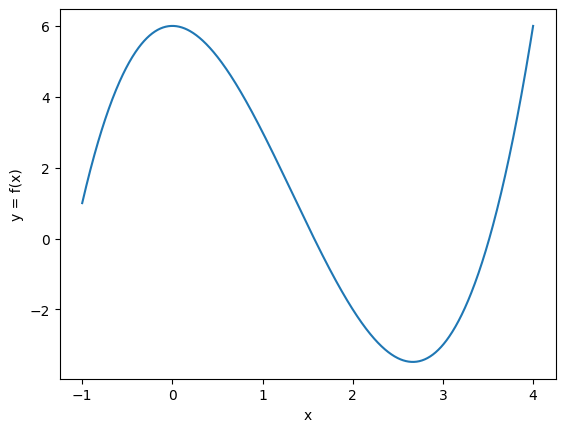

In [2]:
f_x = lambda x: (x ** 3) - 4 * (x ** 2) + 6
x = np.linspace(-1,4,1000)

# Plot the curve
plt.plot(x, f_x(x))
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.show()

In [15]:
from sympy import Symbol, lambdify

In [16]:
# Define the function and its derivative

x = Symbol('x')
f = (x ** 3) - 4 * (x ** 2) + 6
df_dx = f.diff(x)

print(f)
print(df_dx)

f = lambdify(x, f)
df_dx = lambdify(x, df_dx)

print(f)
print(df_dx)

x**3 - 4*x**2 + 6
3*x**2 - 8*x
<function _lambdifygenerated at 0x0000028539A6D800>
<function _lambdifygenerated at 0x0000028539A6CA40>


In [6]:
# Alternate Way

f_x_derivative = lambda x: 3 * (x ** 2) - 8 * x

In [17]:
# Define function to plot the gradient descent
def plot_gradient(x, y, x_vis, y_vis):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 2)
    plt.scatter(x_vis, y_vis, c="b")
    plt.plot(x, f(x), c="r")
    plt.title("Gradient Descent")
    
    plt.subplot(1, 2, 1)
    plt.scatter(x_vis, y_vis, c="b")
    plt.plot(x, f(x), c="r")
    plt.xlim([2.0, 3.0])
    plt.title("Zoomed in Figure")
    
    plt.show()

In [26]:
# Define function to perform gradient descent
def gradient_iterations(x_start, iterations, learning_rate):
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f(x_start)]
    
    # Keep looping until number of iterations
    for i in range(iterations):
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = -df_dx(x_start)
        
        # calculate x_start by adding the previous value to
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
        
        x_grad.append(x_start)
        y_grad.append(f(x_start))
        print(f"Local minimum occurs at: {x_start:.2f}")

    
    print(f"\nLocal minimum occurs at: {x_start:.2f}")
    print("Number of steps: ", len(x_grad) - 1)
    
    x = np.linspace(-1, 4, 1000)
    plot_gradient(x, f(x), x_grad, y_grad)

Local minimum occurs at: 0.66
Local minimum occurs at: 0.86
Local minimum occurs at: 1.09
Local minimum occurs at: 1.35
Local minimum occurs at: 1.62
Local minimum occurs at: 1.87
Local minimum occurs at: 2.10
Local minimum occurs at: 2.28
Local minimum occurs at: 2.41
Local minimum occurs at: 2.50
Local minimum occurs at: 2.56
Local minimum occurs at: 2.60
Local minimum occurs at: 2.63
Local minimum occurs at: 2.64
Local minimum occurs at: 2.65
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local mini

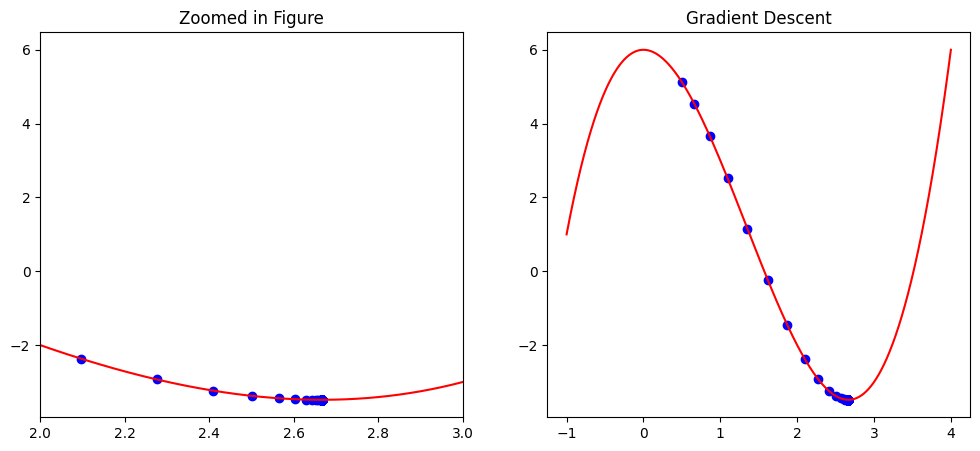

In [27]:
# Running gradient descent
gradient_iterations(0.5, 1000, 0.05)

We are able to find the Local minimum at 2.67 and as we have given the number of iterations as
1000, Algorithm has taken 1000 steps. It might have reached the value 2.67 at a much earlier
iteration. But since we don't know at what point will our algorithm reach the local minimum with
the given learning rate, we give a high value of iteration just to be sure that we find our local
minimum.

In [24]:
# Define function to perform gradient descent based on precision
def gradient_precision(x_start, precision, learning_rate):
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f(x_start)]
    
    while True:
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = -df_dx(x_start)
        
        # calculate x_start by adding the previous value to
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
        
        x_grad.append(x_start)
        y_grad.append(f(x_start))
        
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[-1] - x_grad[-2]) <= precision:
            break
    
    print("Local minimum occurs at: {:.2f}".format(x_start))
    print("Number of steps taken: ", len(x_grad) - 1)
    
    x = np.linspace(-1, 4, 1000)
    plot_gradient(x, f(x), x_grad, y_grad)

Now let's call this function with parameters x_start = 0.5, precision = 0.001, learning rate = 0.05

Local minimum occurs at: 2.67
Number of steps taken:  24


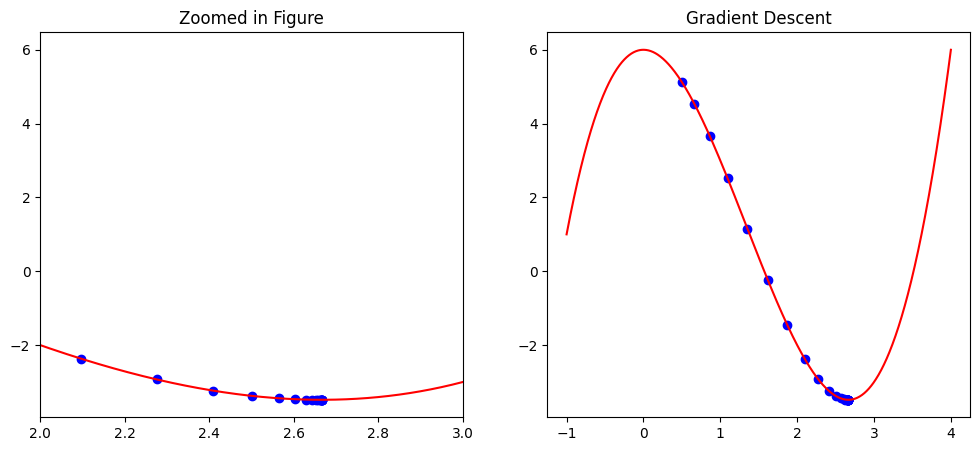

In [28]:
# Running gradient descent with precision
gradient_precision(0.5, 0.0001, 0.05)

In [29]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(x_start, precision, learning_rate, max_epochs=1000):
    x_grad = [x_start]
    y_grad = [f(x_start)]
    
    for epoch in range(max_epochs):
        # Simulate a random "x" value (here the same value as x_start, but could be different in a real dataset)
        x_i = x_start
        
        # Update using the gradient at this random point
        x_start_derivative = -df_dx(x_i)
        x_start += learning_rate * x_start_derivative
        
        x_grad.append(x_start)
        y_grad.append(f(x_start))
        
        # Stop if change in x is smaller than the precision
        if abs(x_grad[-1] - x_grad[-2]) <= precision:
            break
    
    print("SGD Local minimum occurs at: {:.2f}".format(x_start))
    print("Number of steps taken: ", len(x_grad) - 1)
    
    x = np.linspace(-1, 4, 1000)
    plot_gradient(x, f(x), x_grad, y_grad)

SGD Local minimum occurs at: 2.67
Number of steps taken:  24


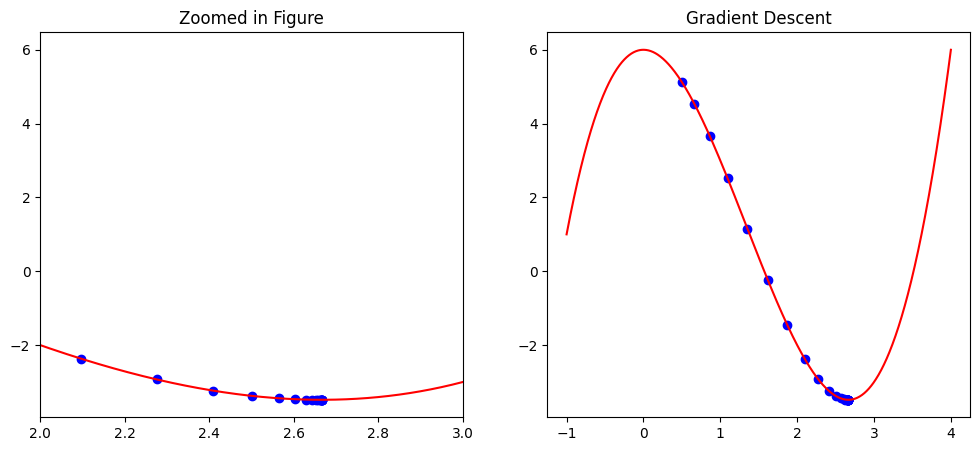

In [31]:
# Running Stochastic Gradient Descent
stochastic_gradient_descent(0.5, 0.0001, 0.05)

In [32]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(x_start, precision, learning_rate, batch_size=5, max_epochs=1000):
    x_grad = [x_start]
    y_grad = [f(x_start)]
    
    for epoch in range(max_epochs):
        # Simulate batch gradients by averaging over a number of points (here we use the same x_start, but could be different)
        batch_gradient = 0
        for i in range(batch_size):
            x_i = x_start
            batch_gradient += df_dx(x_i)
        batch_gradient /= batch_size
        
        # Update using the average gradient of the batch
        x_start -= learning_rate * batch_gradient
        
        x_grad.append(x_start)
        y_grad.append(f(x_start))
        
        # Stop if change in x is smaller than the precision
        if abs(x_grad[-1] - x_grad[-2]) <= precision:
            break
    
    print("Mini-batch GD Local minimum occurs at: {:.2f}".format(x_start))
    print("Number of steps taken: ", len(x_grad) - 1)
    
    x = np.linspace(-1, 4, 1000)
    plot_gradient(x, f(x), x_grad, y_grad)

Mini-batch GD Local minimum occurs at: 2.67
Number of steps taken:  24


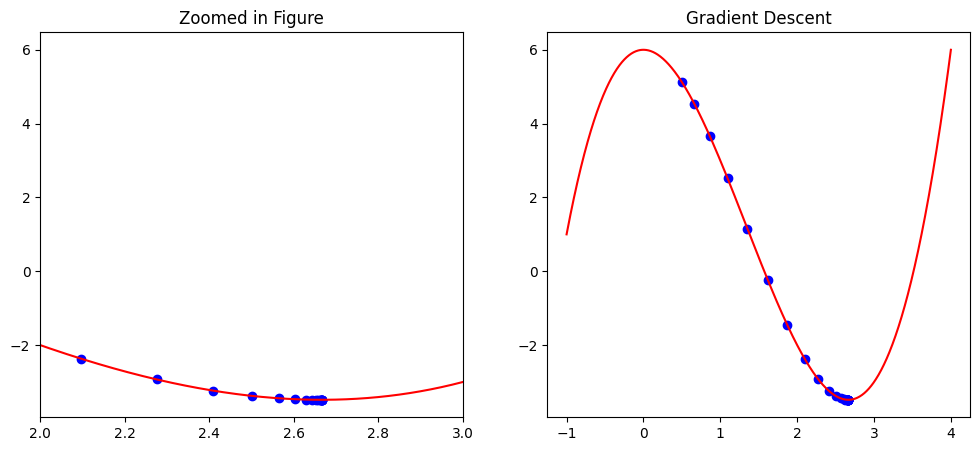

In [33]:
# Running Mini-batch Gradient Descent
mini_batch_gradient_descent(0.5, 0.0001, 0.05, batch_size=5)